<ipython-input-1-5364ac399230>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)
<ipython-input-1-5364ac399230>:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'],color='r')
<ipython-input-1-5364ac399230>:37: UserWarning: 

`distplot` is a deprecated function and will be remov

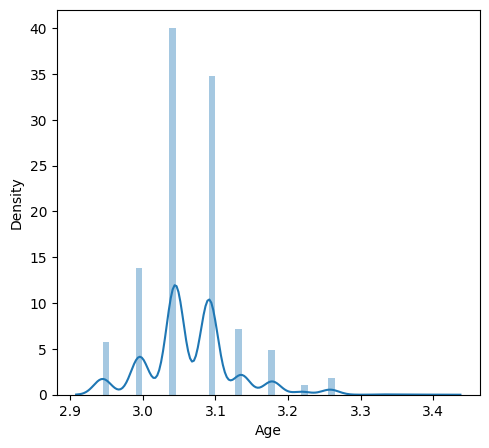

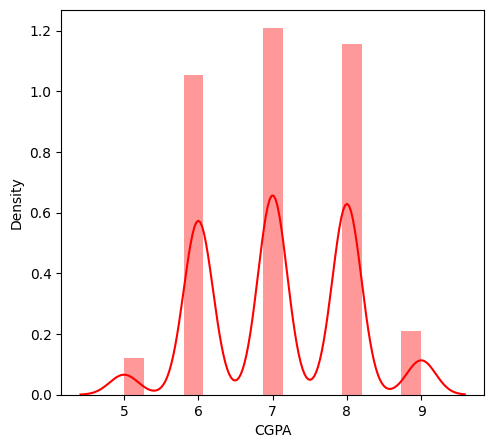

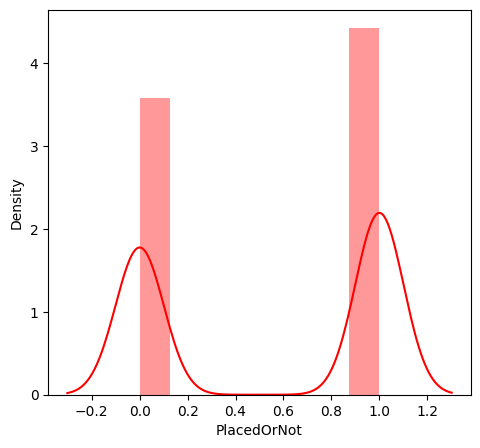

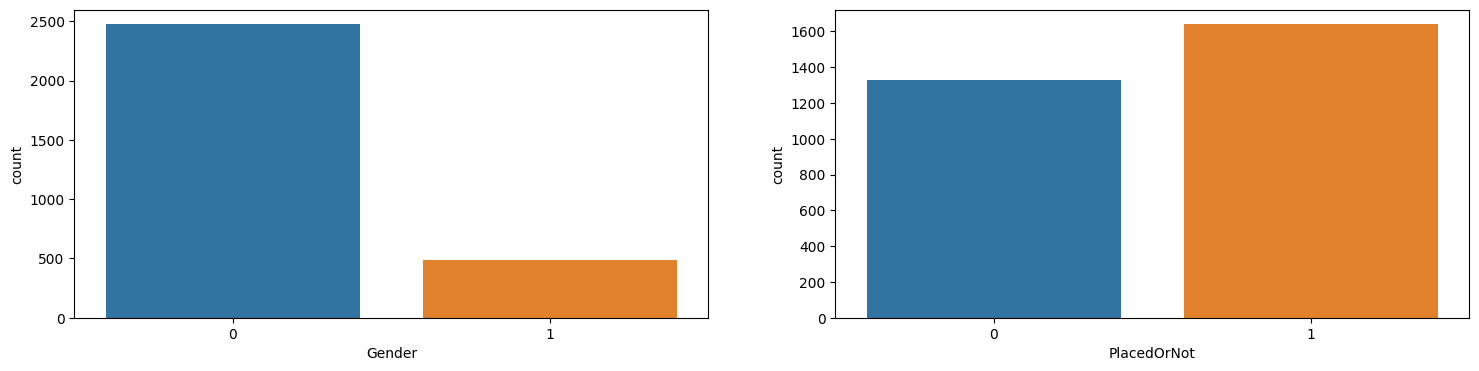

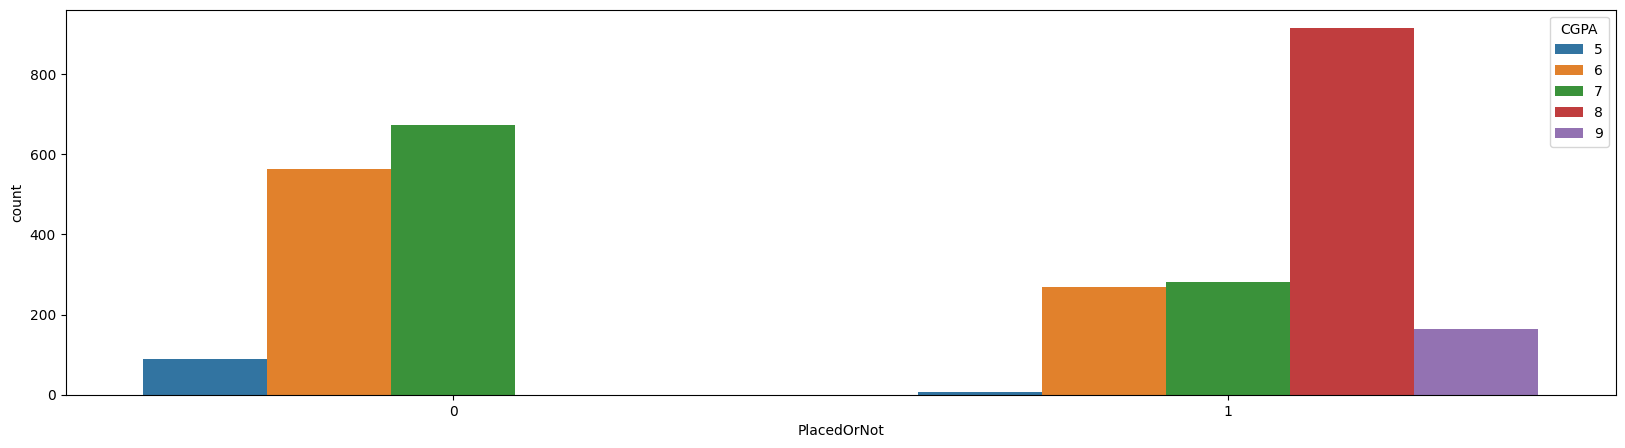

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 88.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 87.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 93.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 93.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


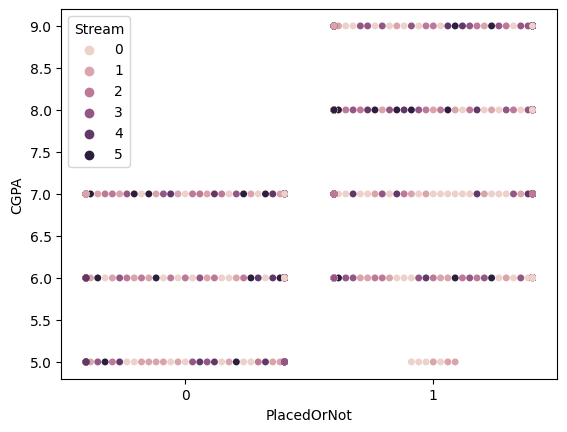

---Results---
K: {'Regular': 7}
Score: {'Regular': 86.19528619528619}


In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import accuracy_score
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/collegePlace.csv")
df.head()
df.shape
df.info
df.isnull().sum()
def transformationplot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.distplot(feature)

transformationplot(np.log(df['Age']))
df = df.replace(['Male'], [0])
df = df.replace(['Female'], [1])
df = df.replace(['Computer Science','Information Technology','Electronics And Communication','Mechanical','Electrical','Civil'], [0,1,2,3,4,5])
df = df.drop(['Hostel'], axis=1)                 
df
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['CGPA'],color='r')
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['PlacedOrNot'],color='r')
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.countplot(data=df, x='Gender')
plt.subplot(1,2,2)
sns.countplot(data=df, x='PlacedOrNot')
plt.show()
plt.figure(figsize=(20,5))
sns.countplot(x='PlacedOrNot', hue='CGPA', data=df)
plt.show()
sns.swarmplot(x='PlacedOrNot', y='CGPA', hue='Stream', data=df)
plt.show()
x_bal = df.drop('PlacedOrNot', axis=1)
names = x_bal.columns
sc=StandardScaler()
x_bal=sc.fit_transform(x_bal)
x_bal = pd.DataFrame(x_bal,columns=names)
X = x_bal
Y = df['PlacedOrNot']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)
best_k = {"Regular":0}
best_score = {"Regular":0}

for k in range(3, 50, 2):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, Y_train)
    knn_temp_pred = knn_temp.predict(X_test)
    score = accuracy_score(Y_test, knn_temp_pred)
    if score >= best_score["Regular"] and score < 1:
        best_score["Regular"] = score
        best_k["Regular"] = k

best_score["Regular"] = best_score["Regular"] * 100
print("---Results---\nK: {}\nScore: {}".format(best_k, best_score))

knn = KNeighborsClassifier(n_neighbors=best_k["Regular"])
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
testd = accuracy_score(knn_pred, Y_test)
import pickle
pickle.dump(knn,open("placement.pkl",'wb'))
model = pickle.load(open('placement.pkl', 'rb'))